이미지 필터링

임계처리

임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값(threshold)를 사용하여 이진화(binarization)하는 가장 단순한 필터다. OpenCV에서는 threshold라는 함수로 구현되어 있다. 인수는 다음과 같다.

threshold(src, thresh, maxval, type)

src : 그레이 스케일 이미지

thresh : 기준값

maxval : 기준값을 넘었을 때 적용할 최대값

type : 임계처리 유형

THRESH_BINARY : 기준값을 넘으면 최대값 아니면 0

THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값

THRESH_TRUNC : 기준값을 넘으면 기준값 아니면 최대값

THRESH_TOZERO : 기준값을 넘으면 원래값 아니면 0

THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값

In [11]:
import cv2
from skimage.data import coins
import matplotlib.pylab as plt

plt.rc('font', family='NanumMyeongjo') # For Windows
print(plt.rcParams['font.family'])

['NanumMyeongjo']


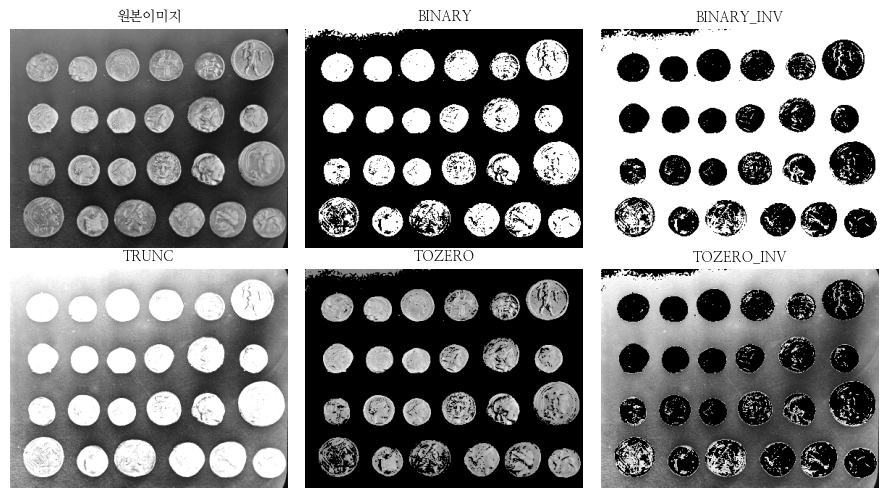

In [14]:
img = coins()

maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9,5))
for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize':10})
    plt.axis('off')
    
plt.tight_layout(pad=1)
plt.show()

적응임계처리


임계처리의 경우는 이미지 전체에 하나의 기준값을 적용한다. 적응임계처리는 일정한 영역 내의 이웃한 픽셀들의 값들을 이용하여 해당 영역에 적용할 기준값을 자체적으로 계산한다. OpenCV에서는 adaptiveThreshold 함수로 구현되어 있다.

adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

src : 그레이스케일 이미지

maxValue – 기준값을 넘었을 때 적용할 값

adaptiveMethod : 영역 내에서 기준값을 계산하는 방법.

ADAPTIVE_THRESH_MEAN_C: 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용

ADAPTIVE_THRESH_GAUSSIAN_C: 영역에 추후 설명할 가우시안 블러를 적용한 후 C를 뺀 값을 기준값으로 사용

thresholdType : 임계처리 유형

THRESH_BINARY

THRESH_BINARY_INV

blockSize : 임계처리를 적용할 영역의 크기

C : 평균이나 가중평균에서 차감할 값

In [15]:
from skimage.data import page

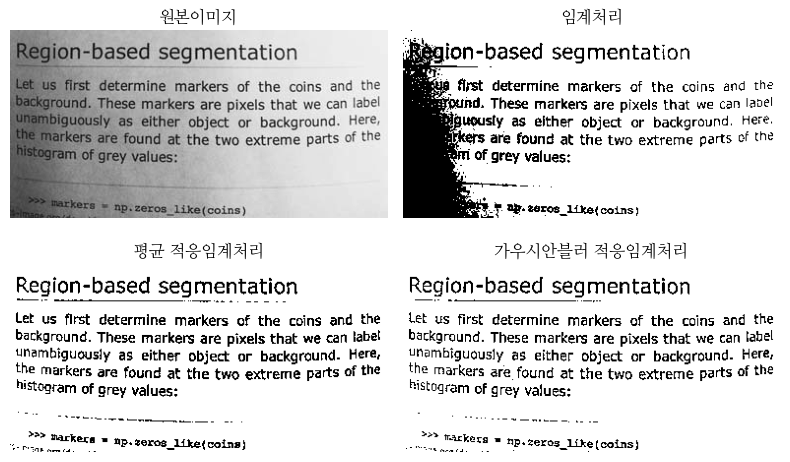

In [17]:
img = page()

maxval=255
thresh =126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
c = 20

th2 = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, c)
th3 = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, c)

images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

